# Project: Data Analysis using Python

In this project, you will use the the Python packages pandas, matplotlib, numpy to analyze and visualize a data set.
You will also train basic machine learning models using the scikit-learn package.

The data you will explore consist of physiochemical measurements for about 6500 different varieties of wines. 
All wines are varieties of Portoguese "Vinho Verde" wines, which include both red and white wines. 

The raw version of the data set is available here: https://archive.ics.uci.edu/ml/datasets/wine_quality
The data were originally collected by: Paulo Cortez, Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis
The data set is described in more detail in the following paper: 

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.


For each instance, there are 13 columns.

1. fixed acidity
2. volatile acidity - correlated to the vinegar flavor in some wines
3. citric acid 
4. residual sugar - correlated to how 'dry' or 'sweet' the wine is
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (subjective sensory score between 0 and 10)
13. type (0 = red wine, 1 = white wine) 


Column 1 to 11 are objective physiochemical measurements. Column 12 is a subjective sensory score for the wine quality, assigned by an expert. Column 13 indicates whether the wine is red or white. 

The main outcome of the project will be a classifier of wines into red and white varieties, as well as a regression model that predicts a wine's quality from it's physiochemical attributes. 

You will also explore the relation between various attributes. For example, a higher value of citric acid should result in a higher value of fixed acidity, as well as lower pH. A higher value in alcohol should correspond to a lower value in residual sugar (because alcohol is produced from sugar during fermentation). 

To complete the project, work through the steps below. You may want to revisit the course materials for the segments on matplotlib, pandas, and scipy/scikit-learn. Consult the numpy, matplotlib, pandas, and scikit-learn documentation if necessary. Feel free to experiment further. 

All necessary packages have been installed in this Codio project already. 

## Step 1: Reading the Data 

1.1 Read the data in the file `wines.csv` and store it in a pandas data frame called `data`. You could use the function [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) in the package `pandas.io.parsers`. The resulting data frame should have 6497 rows x 13 columns.

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from pandas.io.parsers import read_csv

data = read_csv('wines.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


1.2. Next, we will divide the data into a training set and a test set. Your training set should contain 90% of the data, which amounts to 5847 instances. The remaining 650 instances should be used for testing.  We will set the test data aside until later in this project, when we use it for evaluating machine learning models.

We can do this by using the sample method of the pandas dataframe object. We first extract a random test sample. 
This step has already been completed. 

In [4]:
test = data.sample(frac=0.1)
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2598,7.8,0.28,0.31,2.1,0.046,28.0,208.0,0.99434,3.23,0.64,9.8,5,1
6103,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7,0
856,8.2,0.38,0.49,13.6,0.042,58.0,166.0,0.99855,3.10,0.54,9.4,5,1
2667,6.6,0.12,0.25,1.4,0.039,21.0,131.0,0.99114,3.20,0.45,11.2,7,1
5012,7.8,0.56,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,6.8,0.64,0.03,2.3,0.075,14.0,31.0,0.99545,3.36,0.58,10.4,6,0
782,6.9,0.22,0.37,15.0,0.053,59.0,178.0,0.99920,3.37,0.82,9.5,7,1
3144,6.2,0.23,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,6,1
2895,6.4,0.44,0.26,2.0,0.054,20.0,180.0,0.99520,3.58,0.57,10.0,5,1


Next, we drop the rows in the test sample from the data set to obtain the training data set. 
We will call sample on the training data once more to shuffle the order of rows. 

In [5]:
#show all column names
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [6]:

train = data.drop(test.index)

train = train.sample(frac=1)

In [7]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6212,7.0,0.36,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1,6,0
6407,7.9,0.18,0.40,1.8,0.062,7.0,20.0,0.99410,3.28,0.70,11.1,5,0
248,5.6,0.19,0.26,1.4,0.030,12.0,76.0,0.99050,3.25,0.37,10.9,7,1
4940,7.5,0.49,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6,0
1216,8.2,0.37,0.36,1.0,0.034,17.0,93.0,0.99060,3.04,0.32,11.7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484,11.1,0.31,0.49,2.7,0.094,16.0,47.0,0.99860,3.12,1.02,10.6,7,0
450,7.2,0.60,0.20,9.9,0.070,21.0,174.0,0.99710,3.03,0.54,9.1,5,1
5730,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
2740,6.3,0.20,0.19,12.3,0.048,54.0,145.0,0.99668,3.16,0.42,9.3,6,1


In [8]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2598,7.8,0.28,0.31,2.1,0.046,28.0,208.0,0.99434,3.23,0.64,9.8,5,1
6103,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7,0
856,8.2,0.38,0.49,13.6,0.042,58.0,166.0,0.99855,3.10,0.54,9.4,5,1
2667,6.6,0.12,0.25,1.4,0.039,21.0,131.0,0.99114,3.20,0.45,11.2,7,1
5012,7.8,0.56,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,6.8,0.64,0.03,2.3,0.075,14.0,31.0,0.99545,3.36,0.58,10.4,6,0
782,6.9,0.22,0.37,15.0,0.053,59.0,178.0,0.99920,3.37,0.82,9.5,7,1
3144,6.2,0.23,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,6,1
2895,6.4,0.44,0.26,2.0,0.054,20.0,180.0,0.99520,3.58,0.57,10.0,5,1


## Step 2: Data Visualization 


### Class distribution  

2.1 Using the [`bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) function in the module `matplotlib.pyplot` plot a bar chart of the distribution of white and red wines in the training set. Hint: First select the `type` column from the training set, then count how many wines of type 0 and type 1 there are. 
The [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) method of the data frame may be useful. 

In [9]:
from matplotlib import pyplot as plt 

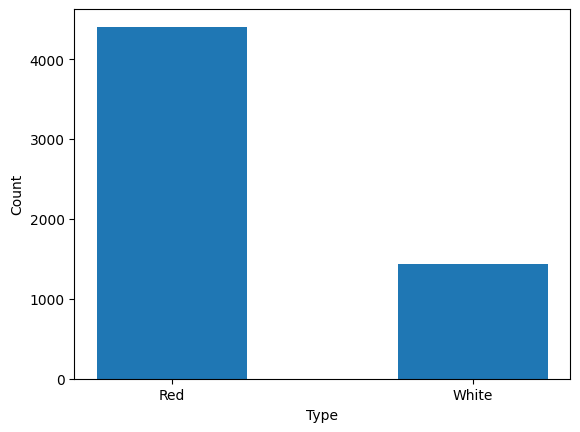

In [10]:
plt.bar(train['type'].unique(), train['type'].value_counts(), width=0.5, tick_label=['Red', 'White'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

2.2 You can also try to plot a pie chart to visualize this information. Take a look at the documentation for [matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html).

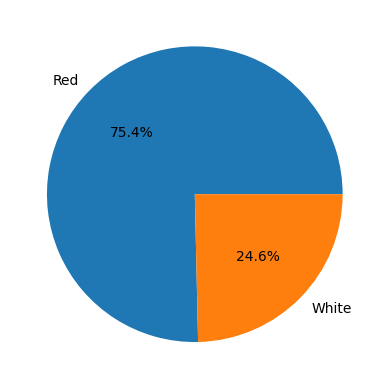

In [11]:
plt.pie(train['type'].value_counts(), labels=['Red', 'White'], autopct='%1.1f%%')
plt.show()

2.3 Next, take a look look at the distribution of the 'quality' ratings in the training data. A bar chart is the most intuitive way of representing this information. You could also try to to use a histogram (using the [`matplotlib.pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function). What is the difference between the bar chart and the histogram?

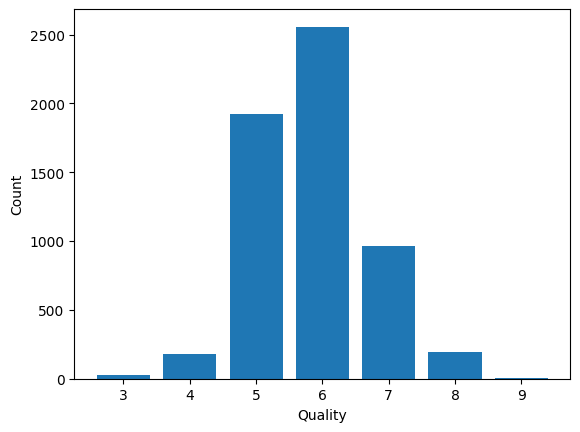

In [12]:
plt.bar(train['quality'].unique(), train['quality'].value_counts())
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

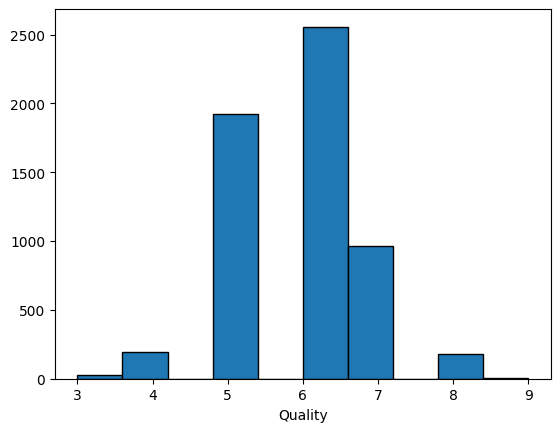

In [13]:
plt.hist(train['quality'], edgecolor='black')
plt.xlabel('Quality')
plt.show()

In [14]:
#Bar graph is used to represent categorical data and histogram is better for continuous dataset with intervals

### Attribute Distributions 

2.4 Next, also plot histograms for some of the attributes for the training data. For example, it is interesting to see how the 'pH', 'alcohol', 'citric acid' and 'risidual sugar' values are distributed. You can use [`matplotlib.pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function.

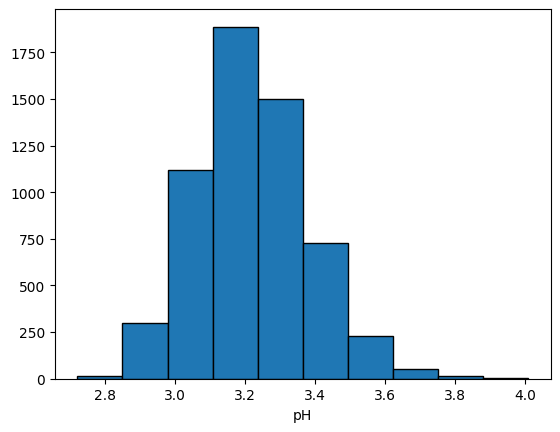

In [15]:
plt.hist(train['pH'], edgecolor='black')
plt.xlabel('pH')
plt.show()

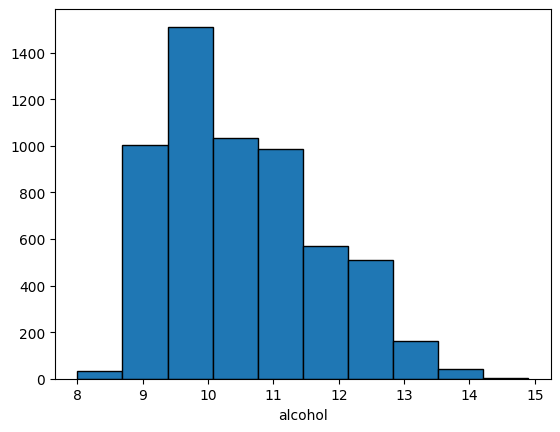

In [16]:
plt.hist(train['alcohol'], edgecolor='black')
plt.xlabel('alcohol')
plt.show()

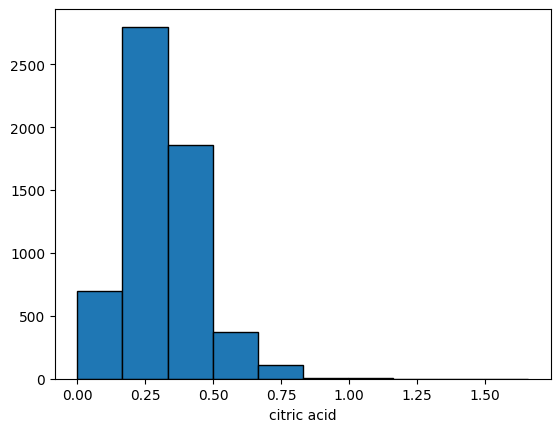

In [17]:
plt.hist(train['citric acid'], edgecolor='black')
plt.xlabel('citric acid')
plt.show()

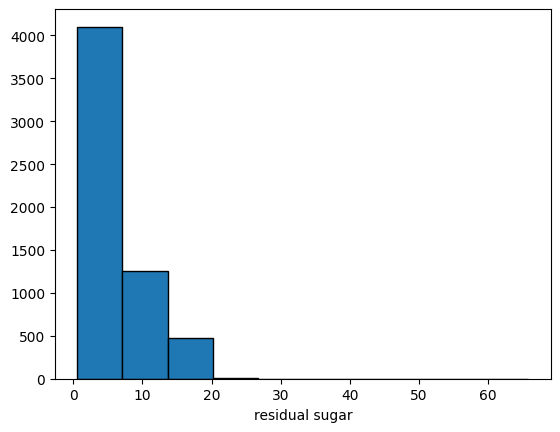

In [18]:
plt.hist(train['residual sugar'], edgecolor='black')
plt.xlabel('residual sugar')
plt.show()

2.5 Next filter the training set into white and red wines (using the type column). Then plot histograms for individual attributes. Try to find attributes for which the distribution differs between red and white wines. 

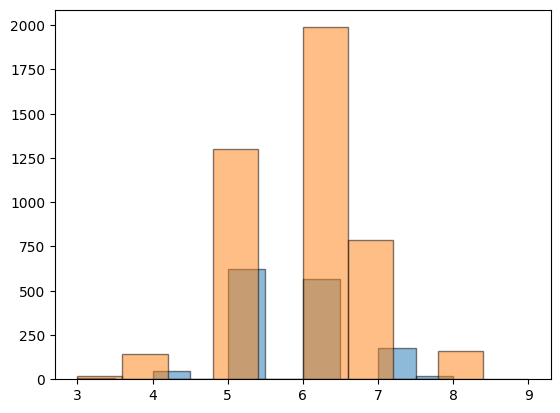

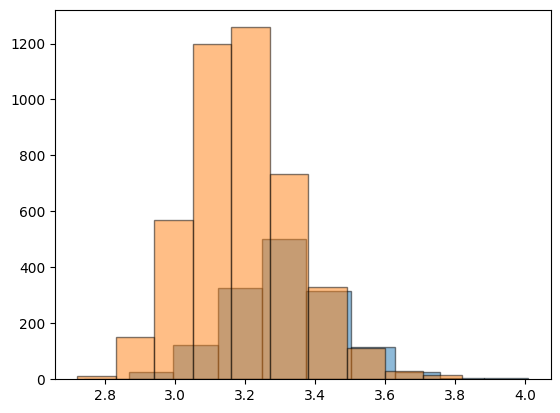

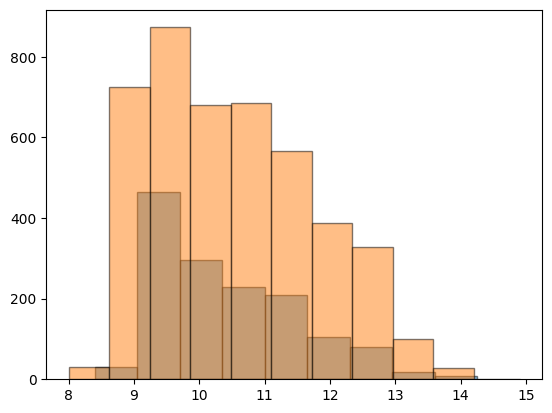

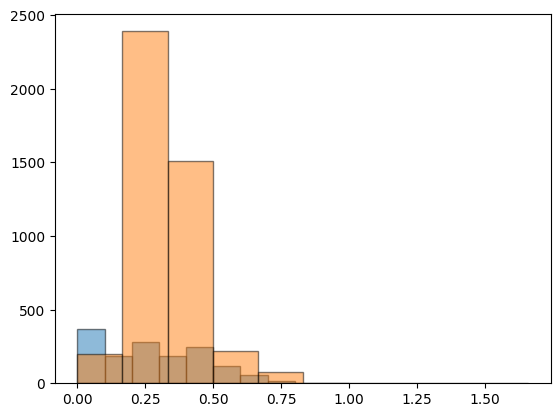

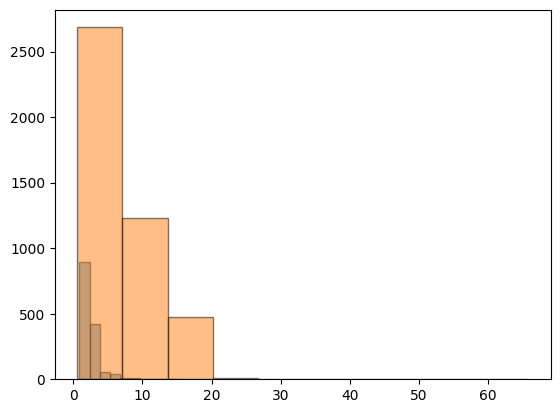

In [19]:
red = train[train['type'] == 0]
white = train[train['type'] == 1]
plt.hist(red['quality'], alpha=0.5, label='Red', edgecolor='black')
plt.hist(white['quality'], alpha=0.5, label='White', edgecolor='black')
plt.show()
plt.hist(red['pH'], alpha=0.5, label='Red', edgecolor='black')
plt.hist(white['pH'], alpha=0.5, label='White', edgecolor='black')
plt.show()
plt.hist(red['alcohol'], alpha=0.5, label='Red', edgecolor='black')
plt.hist(white['alcohol'], alpha=0.5, label='White', edgecolor='black')
plt.show()
plt.hist(red['citric acid'], alpha=0.5, label='Red', edgecolor='black')
plt.hist(white['citric acid'], alpha=0.5, label='White', edgecolor='black')
plt.show()
plt.hist(red['residual sugar'], alpha=0.5, label='Red', edgecolor='black')
plt.hist(white['residual sugar'], alpha=0.5, label='White', edgecolor='black')
plt.show()

### Scatter Plots

2.6 Next, create 2D scatter plot of pairs of attributes for the instances in the training data. Use the [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function. 

Plot the following: 

* 'residual sugar' v.s. 'alcohol' 
* 'citric acid' v.s. 'pH'
* 'citric acid' v.s. 'fixed acidity'

This should reveal some interesting correlations. 

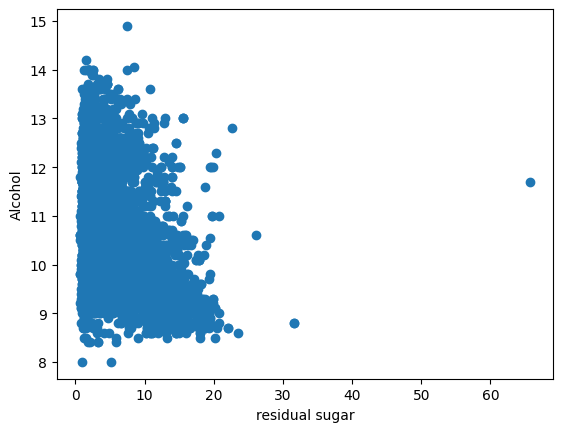

In [68]:
plt.scatter(train['residual sugar'], train['alcohol'])
plt.xlabel('residual sugar')
plt.ylabel('Alcohol')
plt.show()

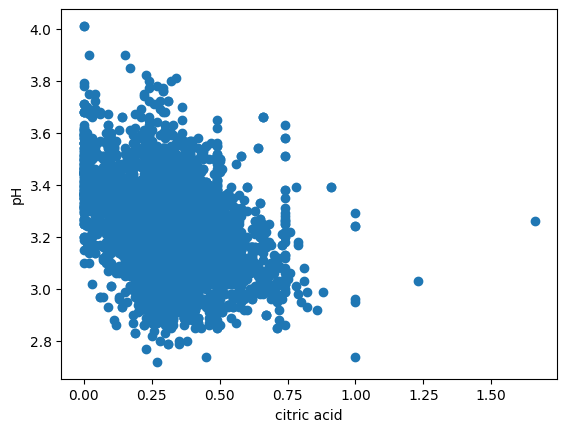

In [71]:

plt.scatter(train['citric acid'], train['pH'])
plt.xlabel('citric acid')
plt.ylabel('pH')
plt.show()

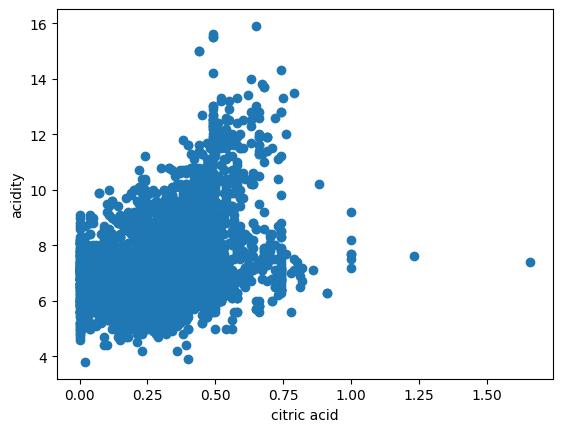

In [72]:
plt.scatter(train['citric acid'], train['fixed acidity'])
plt.xlabel('citric acid')
plt.ylabel('acidity')
plt.show()

## Step 3: Regression Analysis: Residual Sugar vs. Alcohol


It makes sense that the amount of residual sugar is negatively correlated with the amount of alcohol because, during fermentation, sugar is converted in alcohol. If fermentation is stopped early, more sugar remains. The amount of sugar also depends on grape variety and time of harvest. 
 
3.1 In the segment on pandas, we used the function [`numpy.linalg.lstsq`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html). Using this approach, perform linear regression between the 'residual sugar' and 'alcohol' attributes on the training data. The method will return a list of coefficients: the slope m, and the intercept c. 

3.2 Then, repeat the scatter plot for these attributes from step 2 and add a regression line. 
Note that the plot may look a little strange due to one or more outliers in the data. If you have the time, it may be worth trying to remove these before performing regression. 


3.3 (optional) You can also experiment with volatile acidity vs. pH or volatile acidity vs. citric acid.

3.4 (optional) You may also want to take a look at [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py) for an alternative approach to performing linear regression.

In [23]:
import numpy as np

In [24]:
filtered = train[train['residual sugar'] < 30]
filtered

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6212,7.0,0.36,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1,6,0
6407,7.9,0.18,0.40,1.8,0.062,7.0,20.0,0.99410,3.28,0.70,11.1,5,0
248,5.6,0.19,0.26,1.4,0.030,12.0,76.0,0.99050,3.25,0.37,10.9,7,1
4940,7.5,0.49,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6,0
1216,8.2,0.37,0.36,1.0,0.034,17.0,93.0,0.99060,3.04,0.32,11.7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484,11.1,0.31,0.49,2.7,0.094,16.0,47.0,0.99860,3.12,1.02,10.6,7,0
450,7.2,0.60,0.20,9.9,0.070,21.0,174.0,0.99710,3.03,0.54,9.1,5,1
5730,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
2740,6.3,0.20,0.19,12.3,0.048,54.0,145.0,0.99668,3.16,0.42,9.3,6,1


In [25]:
A = np.vstack([filtered['residual sugar'], np.ones(filtered['residual sugar'].size)]).T
A

array([[ 2.4,  1. ],
       [ 1.8,  1. ],
       [ 1.4,  1. ],
       ...,
       [ 1.5,  1. ],
       [12.3,  1. ],
       [ 8.7,  1. ]])

In [26]:
coefs = np.linalg.lstsq(A, filtered['alcohol'], rcond=None)[0] # TODO complete this
coefs

array([-0.09286719, 11.00080774])

In [27]:
m = coefs[0]
c = coefs[1]
m
c

11.000807744765888

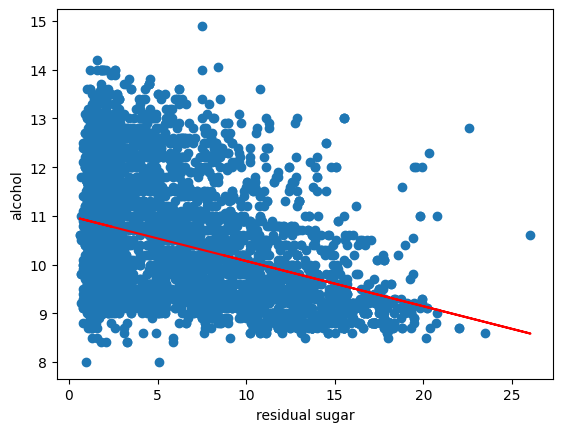

In [28]:
plt.xlabel('residual sugar')
plt.ylabel('alcohol')
plt.scatter(filtered['residual sugar'],filtered['alcohol'])
plt.plot(filtered['residual sugar'], m*filtered['residual sugar']+c, color="red")

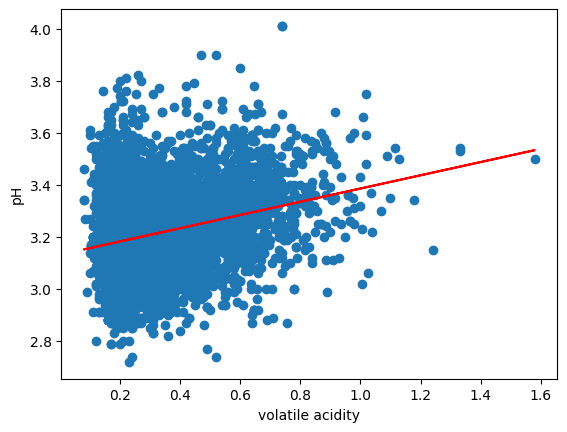

In [49]:
A = np.vstack([filtered['volatile acidity'], np.ones(filtered['pH'].size)]).T
coefs = np.linalg.lstsq(A, filtered['pH'], rcond=None)[0]
m = coefs[0]
c = coefs[1]
plt.xlabel('volatile acidity')
plt.ylabel('pH')
plt.scatter(filtered['volatile acidity'],filtered['pH'])
plt.plot(filtered['volatile acidity'], m*filtered['volatile acidity']+c, color="red")


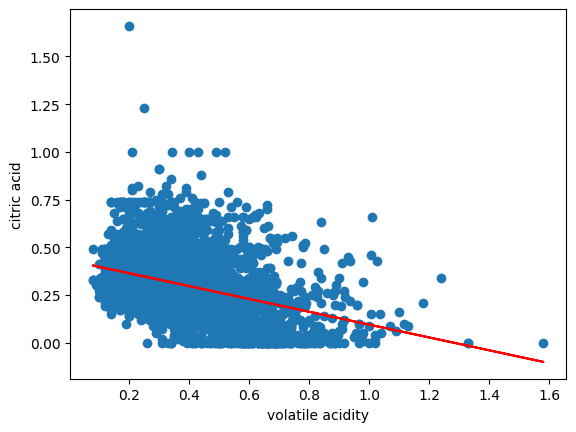

In [52]:
A = np.vstack([filtered['volatile acidity'], np.ones(filtered['citric acid'].size)]).T
coefs = np.linalg.lstsq(A, filtered['citric acid'], rcond=None)[0]
m = coefs[0]
c = coefs[1]
plt.xlabel('volatile acidity')
plt.ylabel('citric acid')
plt.scatter(filtered['volatile acidity'],filtered['citric acid'])
plt.plot(filtered['volatile acidity'], m*filtered['volatile acidity']+c, color="red")

In [65]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
X_train = train[['residual sugar']]  # Keeps it as a DataFrame
X_test = test[['residual sugar']]  # Keeps it as a DataFrame

# The target variables are fine as Series (1D)
y_train = train['alcohol']
y_test = test['alcohol']

regression.fit(X_train, y_train)
score = regression.score(X_test, y_test)

print(score)

0.1447897043003512


In [73]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
X_train = train[['volatile acidity']]  # Keeps it as a DataFrame
X_test = test[['volatile acidity']]  # Keeps it as a DataFrame

# The target variables are fine as Series (1D)
y_train = train['pH']
y_test = test['pH']

regression.fit(X_train, y_train)
score = regression.score(X_test, y_test)

print(score)

0.07851798808649901


In [62]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
X_train = train[['volatile acidity']]  # Keeps it as a DataFrame
X_test = test[['volatile acidity']]  # Keeps it as a DataFrame

# The target variables are fine as Series (1D)
y_train = train['citric acid']
y_test = test['citric acid']

regression.fit(X_train, y_train)
score = regression.score(X_test, y_test)

print(score)

0.13395700040352942


## Step 4: Classification

Next, we will train several ML classifiers to predict if a wine is red or white. 

4.1 Before we train a classifier, we first need to drop the class label (the type column) as well as the quality column from the training and test data. 

In [29]:
train_x = train.drop(["type","quality"], axis=1)
train_y = train["type"]

In [30]:
train_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
6212,7.0,0.36,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1
6407,7.9,0.18,0.40,1.8,0.062,7.0,20.0,0.99410,3.28,0.70,11.1
248,5.6,0.19,0.26,1.4,0.030,12.0,76.0,0.99050,3.25,0.37,10.9
4940,7.5,0.49,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5
1216,8.2,0.37,0.36,1.0,0.034,17.0,93.0,0.99060,3.04,0.32,11.7
...,...,...,...,...,...,...,...,...,...,...,...
5484,11.1,0.31,0.49,2.7,0.094,16.0,47.0,0.99860,3.12,1.02,10.6
450,7.2,0.60,0.20,9.9,0.070,21.0,174.0,0.99710,3.03,0.54,9.1
5730,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9
2740,6.3,0.20,0.19,12.3,0.048,54.0,145.0,0.99668,3.16,0.42,9.3


In [31]:
train_y

6212    0
6407    0
248     1
4940    0
1216    1
       ..
5484    0
450     1
5730    0
2740    1
3841    1
Name: type, Length: 5847, dtype: int64

In [32]:
test_x = test.drop(["type","quality"],axis=1)
test_y = test["type"]

In [33]:
test_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2598,7.8,0.28,0.31,2.1,0.046,28.0,208.0,0.99434,3.23,0.64,9.8
6103,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0
856,8.2,0.38,0.49,13.6,0.042,58.0,166.0,0.99855,3.10,0.54,9.4
2667,6.6,0.12,0.25,1.4,0.039,21.0,131.0,0.99114,3.20,0.45,11.2
5012,7.8,0.56,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.5
...,...,...,...,...,...,...,...,...,...,...,...
6360,6.8,0.64,0.03,2.3,0.075,14.0,31.0,0.99545,3.36,0.58,10.4
782,6.9,0.22,0.37,15.0,0.053,59.0,178.0,0.99920,3.37,0.82,9.5
3144,6.2,0.23,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8
2895,6.4,0.44,0.26,2.0,0.054,20.0,180.0,0.99520,3.58,0.57,10.0


In [34]:
test_y

2598    1
6103    0
856     1
2667    1
5012    0
       ..
6360    0
782     1
3144    1
2895    1
3591    1
Name: type, Length: 650, dtype: int64

4.2 Next, train at least three different sklearn classifiers and evaluate them on the test set. The basic approach is illustrated in the lecture on scipy and scikit-learn.  In my experiments, the RandomForestClassifier performed best, achieving a classification accuracy of 99.54.

In [35]:
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
#https://en.wikipedia.org/wiki/Radial_basis_function_kernel
classifier3 = SVC(C=1.0, kernel="rbf") #rbf stands for radial basis function kernel, C is the penalty parameter
classifier3.fit(train_x, train_y)
classifier3.score(test_x, test_y)

0.9584615384615385

In [37]:
classifier2 = Perceptron()
classifier2.fit(train_x, train_y)
classifier2.score(test_x, test_y)

0.9507692307692308

In [38]:
classifier3 = DecisionTreeClassifier()
classifier3.fit(train_x, train_y)
classifier3.score(test_x, test_y)

0.9953846153846154

In [39]:
classifier4 = RandomForestClassifier()
classifier4.fit(train_x, train_y)
classifier4.score(test_x, test_y)

0.9984615384615385

## Step 5: Regression: Predicting Wine Quality

In this last step, we will trian a regression model to predict wine quality from the physiochemical attributes.

5.1 First, we obtain the quality ratings for the train and test instances. 

In [40]:
train_quality = train['quality']
test_quality = test['quality']


5.2 We will use the LinearRegression model in [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Use the `fit` method to find the regression coefficients. Then evaluate the model on the test data. The `score` method of the LinearRegression model returns an R² value by default. In my experiments, I achieved an R² score of 0.2749. If you want to also print the mean squared error, you can use the `predict` method to obtain quality predictions for each instance. Then score these predictions using the `mean_squared_error` function in the [`sklearn.metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error) module. 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [42]:
regression = LinearRegression()
regression.fit(train_x, train_quality)
regression.score(test_x, test_quality)


0.26598734609984376

In [43]:
mean_squared_error(test_quality, regression.predict(test_x))

0.5505946185198891

5.3 Finally, take a look at the coefficients of the trained model. These are stored in the `coef_` attribute of the model. Which of the attributes is the most important in determining wine quality according to the model?

In [44]:
coefficients = regression.coef_
coefficients

array([ 6.40176488e-02, -1.35497141e+00, -1.12240543e-01,  4.23175756e-02,
       -5.54524016e-01,  5.75550197e-03, -2.46409625e-03, -5.34320172e+01,
        4.34818364e-01,  7.36801824e-01,  2.67853253e-01])

In [45]:
max_coef_index = np.argmax(np.abs(coefficients))
max_coef_index

7

In [46]:
most_important_attritube = train_x.columns[max_coef_index]
most_important_attritube

'density'